# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 5

Group Members:
- Kayla Namira Mariadi (13522050)
- Andhita Naura Hariyanto (13522060)
- Salsabiila (13522062)
- Shulha (13522087)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from collections import Counter
import time
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# sklearn: data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, TargetEncoder
# from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc, roc_auc_score, confusion_matrix, classification_report, log_loss, roc_curve, auc, roc_auc_score, cohen_kappa_score, f1_score, precision_recall_fscore_support

# sklearn: classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# sklearn: dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.optimizers import Adam

## Import Dataset

In [2]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public
# df = pd.read_csv('https://drive.google.com/uc?id=1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU')

unsw_nb15_features_modified_df = pd.read_csv('dataset/train/UNSW-NB15_features-modified.csv')
flow_features_train_df = pd.read_csv('dataset/train/flow_features_train.csv')
basic_features_train_df = pd.read_csv('dataset/train/basic_features_train.csv')
content_features_train_df = pd.read_csv('dataset/train/content_features_train.csv')
time_features_train_df = pd.read_csv('dataset/train/time_features_train.csv')
additional_features_train_df = pd.read_csv('dataset/train/additional_features_train.csv')
labels_train_df = pd.read_csv('dataset/train/labels_train.csv')

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

##### Data Size

In [3]:
# Number of Rows (Excluding Header)
print("Number of Data Entries (Row) for Each Data Frame\n")

# time_features_train
print(f"time_features_train: {len(time_features_train_df)}")

# labels_train
print(f"labels_train: {len(labels_train_df)}")

# flow_features_train
print(f"flow_features_train: {len(flow_features_train_df)}")

# content_features_train
print(f"content_features_train: {len(content_features_train_df)}")

# basic_features_train
print(f"basic_features_train: {len(basic_features_train_df)}")

# additional_features_train
print(f"additional_features_train: {len(additional_features_train_df)}")

Number of Data Entries (Row) for Each Data Frame

time_features_train: 175341
labels_train: 175341
flow_features_train: 175341
content_features_train: 175341
basic_features_train: 175341
additional_features_train: 175341


##### Data Types

In [4]:
# Data Type
print("Data Type for Each Feature Data Frame\n")

# time_features_train
print("time_features_train")
print(time_features_train_df.dtypes)
print()

# labels_train
print("labels_train")
print(labels_train_df.dtypes)
print()

# flow_features_train
print("flow_features_train")
print(flow_features_train_df.dtypes)
print()

# content_features_train
print("content_features_train")
print(content_features_train_df.dtypes)
print()

# basic_features_train
print("basic_features_train")
print(basic_features_train_df.dtypes)
print()

# additional_features_train
print("additional_features_train")
print(additional_features_train_df.dtypes)

Data Type for Each Feature Data Frame

time_features_train
sjit      float64
djit      float64
sinpkt    float64
dinpkt    float64
tcprtt    float64
synack    float64
ackdat    float64
id          int64
dtype: object

labels_train
attack_cat    object
label          int64
id             int64
dtype: object

flow_features_train
proto    object
id        int64
dtype: object

content_features_train
swin                 float64
dwin                 float64
stcpb                float64
dtcpb                float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
id                     int64
dtype: object

basic_features_train
state       object
dur        float64
sbytes     float64
dbytes     float64
sttl       float64
dttl       float64
sloss      float64
dloss      float64
service     object
sload      float64
dload      float64
spkts      float64
dpkts      float64
id           int64
dtype: object

additional_features_tra

In summary,
1. Flow: All attribute Categorical
2. Basic: Categorical (state, service), Numerical (the rest)
3. Content: All attribute Numerical
4. Time: All attribute Numerical
5. Additional: Categorical-Binary (is_sm_ips_ports, is_ftp_login), Numerical (the rest)
6. Label: Categorical (attack_cat, label-binary)

##### Data Statistics (Numerical)

In [5]:
# For time_features_train_df (numeric columns only)
print("\nStatistics for time_features_train_df (Numeric Columns):")
print(time_features_train_df.select_dtypes(include=['number']).describe())

# For labels_train_df (numeric columns only)
print("\nStatistics for labels_train_df (Numeric Columns):")
print(labels_train_df.select_dtypes(include=['number']).describe())

# For flow_features_train_df (numeric columns only)
print("\nStatistics for flow_features_train_df (Numeric Columns):")
print(flow_features_train_df.select_dtypes(include=['number']).describe())

# For content_features_train_df (numeric columns only)
print("\nStatistics for content_features_train_df (Numeric Columns):")
print(content_features_train_df.select_dtypes(include=['number']).describe())

# For basic_features_train_df (numeric columns only)
print("\nStatistics for basic_features_train_df (Numeric Columns):")
print(basic_features_train_df.select_dtypes(include=['number']).describe())

# For additional_features_train_df (numeric columns only)
print("\nStatistics for additional_features_train_df (Numeric Columns):")
print(additional_features_train_df.select_dtypes(include=['number']).describe())



Statistics for time_features_train_df (Numeric Columns):
               sjit           djit         sinpkt         dinpkt  \
count  1.666030e+05  166495.000000  166634.000000  166607.000000   
mean   4.993982e+03     604.891720     987.360974      87.763617   
std    4.506783e+04    4082.439167    7246.462797     987.040024   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.008000       0.000000   
50%    0.000000e+00       0.000000       0.284723       0.006000   
75%    2.511184e+03     114.753348      55.205806      50.933127   
max    1.460480e+06  289388.269700   84371.496000   56716.824000   

              tcprtt         synack         ackdat             id  
count  166505.000000  166605.000000  166746.000000  175341.000000  
mean        0.041331       0.021042       0.020402   87670.000000  
std         0.079428       0.043560       0.040619   50616.731112  
min         0.000000       0.000000       0.000000       

##### Data Unique Values (Categorical)

In [6]:
# Unique Values for Categorical Features
print("Unique Values for Categorical Features\n")

# labels_train
print("labels_train")
non_numeric_labels = labels_train_df.select_dtypes(exclude=[np.number])
print(non_numeric_labels.nunique())
print()

# flow_features_train
print("flow_features_train")
non_numeric_flow = flow_features_train_df.select_dtypes(exclude=[np.number])
print(non_numeric_flow.nunique())
print()

# basic_features_train
print("basic_features_train")
non_numeric_basic = basic_features_train_df.select_dtypes(exclude=[np.number])
print(non_numeric_basic.nunique())
print()

Unique Values for Categorical Features

labels_train
attack_cat    10
dtype: int64

flow_features_train
proto    133
dtype: int64

basic_features_train
state       9
service    13
dtype: int64



##### Missing Values

Missing Values for Each Feature in Each Data Frame

time_features_train
sjit      8738
djit      8846
sinpkt    8707
dinpkt    8734
tcprtt    8836
synack    8736
ackdat    8595
id           0
dtype: int64

labels_train
attack_cat    0
label         0
id            0
dtype: int64

flow_features_train
proto    8826
id          0
dtype: int64

content_features_train
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
id                      0
dtype: int64

basic_features_train
state      8805
dur        8722
sbytes     8561
dbytes     8869
sttl       8825
dttl       8654
sloss      8794
dloss      8978
service    8791
sload      8786
dload      8837
spkts      8654
dpkts      8686
id            0
dtype: int64

additional_features_train
is_sm_ips_ports     8746
ct_state_ttl        8635
ct_flw_http_mthd    8647
is_ftp_login        8647
c

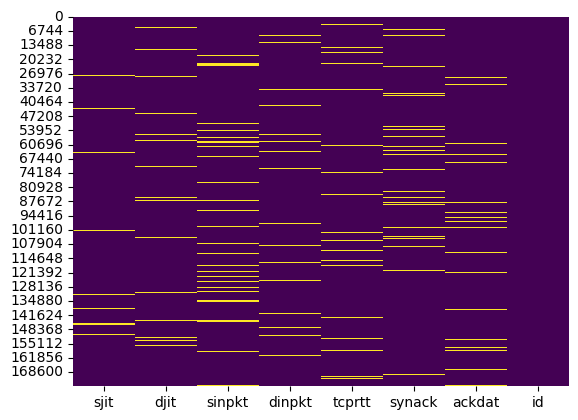

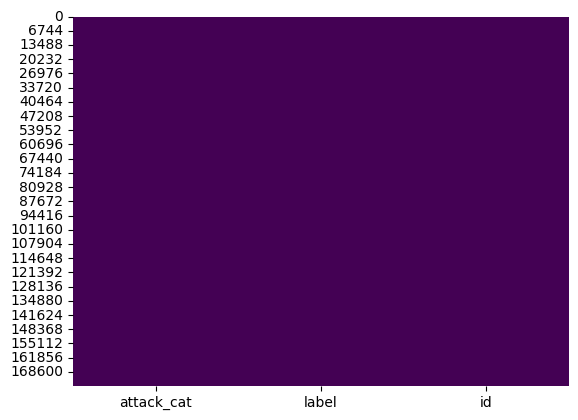

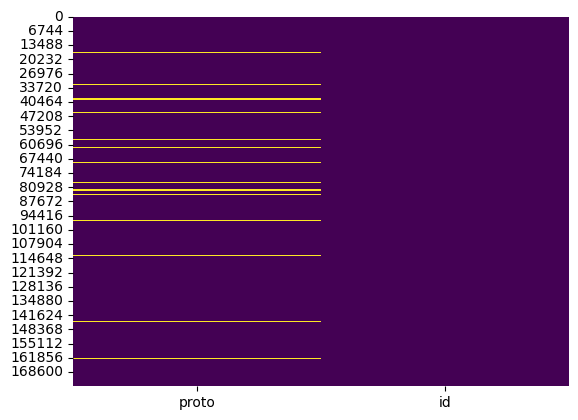

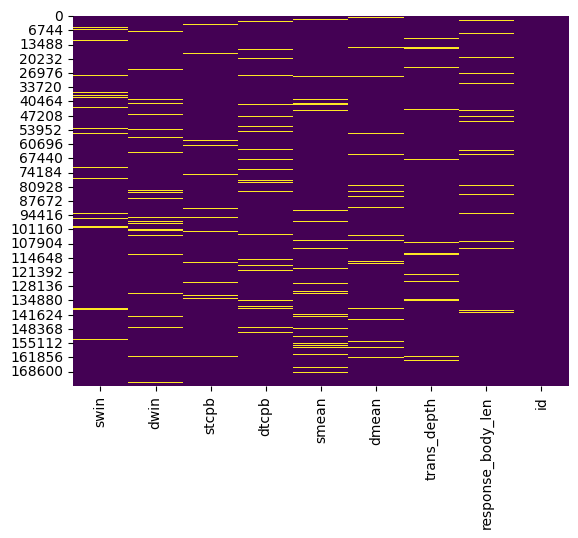

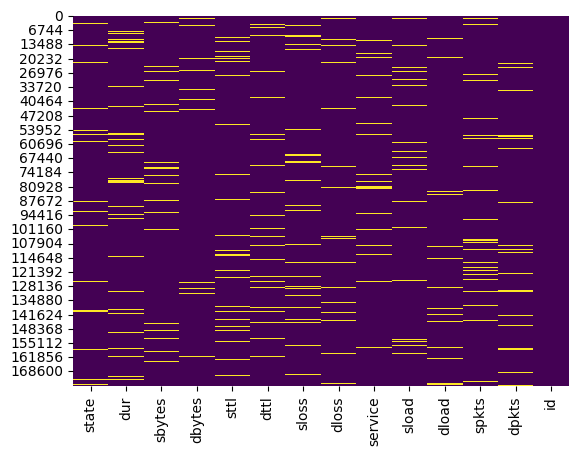

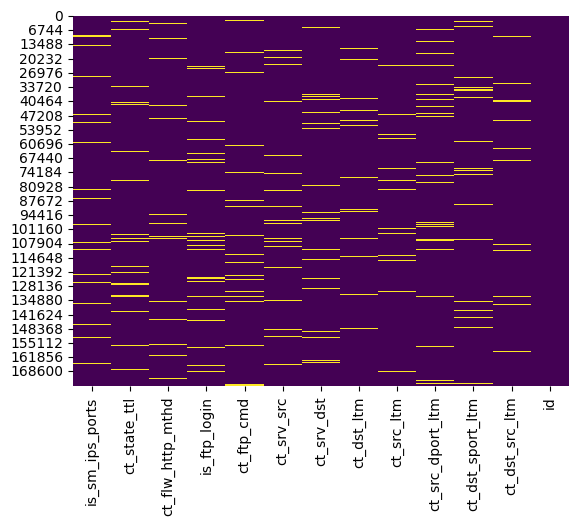

In [7]:
# Missing Values
print("Missing Values for Each Feature in Each Data Frame\n")
# time_features_train
print("time_features_train")
print(time_features_train_df.isnull().sum())
print()

# labels_train
print("labels_train")
print(labels_train_df.isnull().sum())
print()

# flow_features_train
print("flow_features_train")
print(flow_features_train_df.isnull().sum())
print()

# content_features_train
print("content_features_train")
print(content_features_train_df.isnull().sum())
print()

# basic_features_train
print("basic_features_train")
print(basic_features_train_df.isnull().sum())
print()

# additional_features_train
print("additional_features_train")
print(additional_features_train_df.isnull().sum())
print()

sns.heatmap(time_features_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()
sns.heatmap(labels_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()
sns.heatmap(flow_features_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()
sns.heatmap(content_features_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()
sns.heatmap(basic_features_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()
sns.heatmap(additional_features_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()

Missing datas are about 8000 to 9000 rows from more than 170000 data for each attribute, this shows less than 5% data of each attribute is missing.

##### Outliers

In [8]:
def find_outliers_iqr(df):
    for col in df.select_dtypes(include=['number']).columns:
        if col.lower() in ['id']:  # Skip columns named 'no' or 'id'
              continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        max = df[col].max()
        # Find outliers below lower bound and above upper bound
        below_lower = df[df[col] < lower_bound].index.tolist()
        above_upper = df[df[col] > upper_bound].index.tolist()

        # Print outlier information for each column
        print(f"Column: {col}")
        print(f"  Q1: {Q1}")
        print(f"  Q3: {Q3}")
        print(f"  IQR {IQR}")
        print(f"  Max: {max}")
        print(f"  Lower Bound: {lower_bound}")
        print(f"  Upper Bound: {upper_bound}")
        print(f"  Outliers Below Lower Bound: {len(below_lower)}")
        print(f"  Outliers Above Upper Bound: {len(above_upper)}")
        print(f"  Total Outliers: {len(below_lower) + len(above_upper)}\n")

In [9]:
print("Outliers for Each Feature in Each Data Frame using +/- 1.5 IQR Method\n")

print("time_features_train")
find_outliers_iqr(time_features_train_df)
print()

print("labels_train")
find_outliers_iqr(labels_train_df)
print()

print("flow_features_train")
find_outliers_iqr(flow_features_train_df)
print()

print("content_features_train")
find_outliers_iqr(content_features_train_df)
print()

print("basic_features_train")
find_outliers_iqr(basic_features_train_df)
print()

print("additional_features_train")
find_outliers_iqr(additional_features_train_df)
print()

Outliers for Each Feature in Each Data Frame using +/- 1.5 IQR Method

time_features_train
Column: sjit
  Q1: 0.0
  Q3: 2511.1839655000003
  IQR 2511.1839655000003
  Max: 1460480.016
  Lower Bound: -3766.7759482500005
  Upper Bound: 6277.959913750001
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 17146
  Total Outliers: 17146

Column: djit
  Q1: 0.0
  Q3: 114.753348
  IQR 114.753348
  Max: 289388.2697
  Lower Bound: -172.130022
  Upper Bound: 286.88337
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 19538
  Total Outliers: 19538

Column: sinpkt
  Q1: 0.008
  Q3: 55.205805749999996
  IQR 55.19780574999999
  Max: 84371.496
  Lower Bound: -82.788708625
  Upper Bound: 138.00251437499998
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 14034
  Total Outliers: 14034

Column: dinpkt
  Q1: 0.0
  Q3: 50.933127
  IQR 50.933127
  Max: 56716.824
  Lower Bound: -76.39969049999999
  Upper Bound: 127.33281749999999
  Outliers Below Lower Bound: 0
  Outliers A

In [10]:
from scipy.stats import zscore

def find_outliers_zscore(df, threshold=3):
    for col in df.select_dtypes(include=['number']).columns:
        if col.lower() in ['id']:
            continue

        # Calculate Z-scores for the column
        col_zscores = zscore(df[col])  # Avoid NaNs in calculations
        outliers = df[col][abs(col_zscores) > threshold]

        # Print outlier information for each column
        print(f"Column: {col}")
        print(f"  Threshold: {threshold}")
        print(f"  Outliers Below -{threshold}: {sum(col_zscores < -threshold)}")
        print(f"  Outliers Above {threshold}: {sum(col_zscores > threshold)}")
        print(f"  Total Outliers: {len(outliers)}\n")

If the outliers is identified using the interquartile method, there would be very many outliers detected. However, in the context of this network attack data, outliers may sometimes signal genuine anomalies, like network attacks in cybersecurity data, rather than mistakes. In this network dataset, we assumed that outliers could be expected due to network attack patterns and normal vs. abnormal behaviors. This makes it essential to identify these values, as they could be meaningful rather than erroneous. Given the statistics previously (min, max, median) and the Q1, Q3 informations, almost no outliers lie below lower-bound (even Q1 and Q2 most times still 0 or low-value), and very many outliers lie above upper-bound. This may indicates that data with high-value in some features are the not normal data (maybe delay, overbuffer, or other network-related issue).

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [11]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...
merged_df = pd.merge(labels_train_df, flow_features_train_df, on='id')
merged_df = pd.merge(merged_df, basic_features_train_df, on='id')
merged_df = pd.merge(merged_df, content_features_train_df, on='id')
merged_df = pd.merge(merged_df, time_features_train_df, on='id')
merged_df = pd.merge(merged_df, additional_features_train_df, on='id')

train_set, val_set = train_test_split(
    merged_df, 
    test_size=0.2, 
    random_state=42,  
    stratify=merged_df['label']  
)

# train_features = train_df.drop(columns=['id', 'label', 'attack_cat'])  
# train_labels = train_df[['label', 'attack_cat']] 

# val_features = val_df.drop(columns=['id', 'label', 'attack_cat'])
# val_labels = val_df[['label', 'attack_cat']]

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

=======================================================================================

As we can see in the EDA, the missing values are account for about 5% in each attribute, so we will not use the technique deletion of missing data. This is because the amount of missing data is not relatively small to delete listwise and not very big to delete the column. However, we will delete a row or a data if that data have many missing values in more than 3 attributes.

The strategy to handle the other missing values will be imputation. The numerical value will be imputed with median value (since the data is heavily skewed mostly, even if not median is safe). The categorical value (include binary attribute) imputed with most-frequent data.

Strategy for even better cleaning
1. Use IterativeImputer for Numerical Data, but computationally expensive
2. Imputation using knowledge from EDA
3. Use Fancyimpute, but computationally expensive

Aside from handling missing data, in this data cleaning we don't perform adjusting typo values because what we see in EDA, the categories are already unique and not typo.

In [12]:
threshold = int(3)  
train_set = train_set[train_set.isnull().sum(axis=1) <= threshold]
val_set = val_set[val_set.isnull().sum(axis=1) <= threshold]
print(f"Shape of train_set after filtering: {train_set.shape}")
print(f"Shape of val_set after filtering: {val_set.shape}")


Shape of train_set after filtering: (119603, 44)
Shape of val_set after filtering: (29874, 44)


In [13]:
numerical_columns = train_set.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in ['id', 'label']]
categorical_columns = train_set.select_dtypes(include=['object']).columns.tolist() + ['is_sm_ips_ports', 'is_ftp_login']
categorical_columns = list(set(categorical_columns))
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]

median_imputer = SimpleImputer(strategy='median')
train_set[numerical_columns] = median_imputer.fit_transform(train_set[numerical_columns])
val_set[numerical_columns] = median_imputer.transform(val_set[numerical_columns])

frequent_imputer = SimpleImputer(strategy='most_frequent')
train_set[categorical_columns] = frequent_imputer.fit_transform(train_set[categorical_columns])
val_set[categorical_columns] = frequent_imputer.transform(val_set[categorical_columns])

In [14]:
print("==================Validating the Dataset==================")
print("Missing values in train_set:")
print(train_set.isnull().sum().sum())

print("\nMissing values in val_set:")
print(val_set.isnull().sum().sum())


==================Validating the Dataset==================
Missing values in train_set:
0

Missing values in val_set:
0


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

=======================================================================================

As we can see in EDA, we have very many outliers. However, our outliers maybe meaningful. The outliers in our dataset may not show anomalies but maybe provide information regarding whether network data is normal or attacked. Therefore, we do not remove the data with outliers but we clipped/imputed to high percentile. This ensure 'real' outliers is excluded for the data we will use later, and 'meaningful' outliers preserved. Unfortunately, this still result in very many outliers if we use the interquartile method, because most times the outlier upper bound (Q3+1.5*IQR) still lower than the clipping bound. This is okay for now, since we want to preserve the nature of the outlier which we assume meaningful.

In [15]:
def apply_clipping(data, numerical_columns, percentile=85):
    data = data.copy()
    upper_bound = data[numerical_columns].quantile(percentile / 100)
    data[numerical_columns] = data[numerical_columns].clip(upper=upper_bound, axis=1)
    return data

exclude_columns = ['id', 'label','is_sm_ips_ports', 'is_ftp_login']
numerical_columns = [
    col for col in train_set.select_dtypes(include=['int64', 'float64']).columns 
    if col not in exclude_columns
]

train_set= apply_clipping(train_set, numerical_columns)
val_set= apply_clipping(val_set, numerical_columns)


In [16]:
find_outliers_iqr(train_set)

Column: label
  Q1: 0.0
  Q3: 1.0
  IQR 1.0
  Max: 1
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: dur
  Q1: 8e-06
  Q3: 0.631624
  IQR 0.631616
  Max: 1.0553887999999998
  Lower Bound: -0.9474159999999999
  Upper Bound: 1.5790479999999998
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: sbytes
  Q1: 114.0
  Q3: 1280.0
  IQR 1166.0
  Max: 2849.699999999997
  Lower Bound: -1635.0
  Upper Bound: 3029.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: dbytes
  Q1: 0.0
  Q3: 856.0
  IQR 856.0
  Max: 3080.0
  Lower Bound: -1284.0
  Upper Bound: 2140.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 20886
  Total Outliers: 20886

Column: sttl
  Q1: 62.0
  Q3: 254.0
  IQR 192.0
  Max: 254.0
  Lower Bound: -226.0
  Upper Bound: 542.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outl

In [17]:
find_outliers_iqr(train_set)

Column: label
  Q1: 0.0
  Q3: 1.0
  IQR 1.0
  Max: 1
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: dur
  Q1: 8e-06
  Q3: 0.631624
  IQR 0.631616
  Max: 1.0553887999999998
  Lower Bound: -0.9474159999999999
  Upper Bound: 1.5790479999999998
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: sbytes
  Q1: 114.0
  Q3: 1280.0
  IQR 1166.0
  Max: 2849.699999999997
  Lower Bound: -1635.0
  Upper Bound: 3029.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: dbytes
  Q1: 0.0
  Q3: 856.0
  IQR 856.0
  Max: 3080.0
  Lower Bound: -1284.0
  Upper Bound: 2140.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 20886
  Total Outliers: 20886

Column: sttl
  Q1: 62.0
  Q3: 254.0
  IQR 192.0
  Max: 254.0
  Lower Bound: -226.0
  Upper Bound: 542.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outl

As we can see in EDA, we have very many outliers. However, our outliers maybe meaningful. The outliers in our dataset may not show anomalies but maybe provide information regarding whether network data is normal or attacked. Therefore, we do not remove the data with outliers but we do transformation to our data overall. This is so that our data is more normally distributed rather than heavily skewed, and have less outliers.

In [18]:
from sklearn.preprocessing import PowerTransformer

def apply_transformation(data, numerical_columns):
    data = data.copy()
    transformer = PowerTransformer(method='yeo-johnson', standardize=False)
    data[numerical_columns] = transformer.fit_transform(data[numerical_columns])
    return data, transformer

exclude_columns = ['id', 'label','is_sm_ips_ports', 'is_ftp_login'] 
numerical_columns = [
    col for col in train_set.select_dtypes(include=['int64', 'float64']).columns 
    if col not in exclude_columns
]

train_set_transformed, transformer = apply_transformation(train_set, numerical_columns)
val_set_transformed = val_set.copy()
val_set_transformed[numerical_columns] = transformer.transform(val_set[numerical_columns])


In [19]:
find_outliers_iqr(train_set_transformed)

Column: label
  Q1: 0.0
  Q3: 1.0
  IQR 1.0
  Max: 1
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: dur
  Q1: 7.999860862622348e-06
  Q3: 0.24068995200222065
  IQR 0.24068195214135804
  Max: 0.271909446171536
  Lower Bound: -0.36101492835117444
  Upper Bound: 0.6017128802142577
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: sbytes
  Q1: 3.5507242205038825
  Q3: 4.675766257968578
  IQR 1.1250420374646959
  Max: 4.97833291590989
  Lower Bound: 1.8631611643068386
  Upper Bound: 6.363329314165622
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: dbytes
  Q1: -0.0
  Q3: 6.5866918824742795
  IQR 6.5866918824742795
  Max: 7.797831001220674
  Lower Bound: -9.880037823711419
  Upper Bound: 16.4667297061857
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: sttl
  Q1: 63.375607604996

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

=======================================================================================

I use hashing in my dataset to efficiently detect duplicates in a large dataset with 120,000 rows and 45 columns of network attack data. Since each row has a unique "id," it’s nearly impossible to have exact duplicates, but there could still be partial duplicates or very similar rows. Hashing allows me to summarize the data into a unique value for each row, making it easier to identify and remove near-duplicates without the need for expensive row-by-row comparisons. This approach helps optimize performance and memory usage, which is essential given the dataset's size, while ensuring that I only remove truly redundant data.

In [20]:

exclude_columns = ['id', 'label', 'is_sm_ips_ports', 'is_ftp_login']
numerical_columns = [
    col for col in train_set.select_dtypes(include=['int64', 'float64']).columns
    if col not in exclude_columns
]

train_set = train_set.drop_duplicates().reset_index(drop=True)

train_set['row_hash'] = train_set[numerical_columns].apply(
    lambda row: hash(tuple(row.round(2))), axis=1
)
partial_duplicates = train_set[train_set.duplicated(subset=['row_hash'])]
train_set_cleaned = train_set.drop_duplicates(subset=['row_hash']).reset_index(drop=True)

print(f"Original dataset size: {len(train_set)}")
print(f"Cleaned dataset size: {len(train_set_cleaned)}")
print(f"Number of partial duplicates removed: {len(train_set) - len(train_set_cleaned)}")


Original dataset size: 119603
Cleaned dataset size: 85830
Number of partial duplicates removed: 33773


In [21]:
# Separate target from predictors
x_train = train_set_cleaned.drop(columns=['attack_cat', 'label', 'row_hash'], axis=1)
y_train = train_set_cleaned[['attack_cat']]
x_val = val_set.drop(columns=['attack_cat', 'label'])
y_val = val_set[['attack_cat']]


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

1. Feature Selection

In [22]:
from scipy.stats import chi2_contingency

def cramerV(label,x):
    contingency_table = pd.crosstab(label, x)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum() # grand total of value in contingency table
    r,k = contingency_table.shape # dimension of contingency table (r represents row, k represents column)
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1)) # correction of phi
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            v = 0
            # print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            # print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v

In [23]:
# feature selection should only be applied to the training set.

# 1. Removing constant features if there is any with VarianceThreshold

from sklearn.feature_selection import VarianceThreshold

print("Shape of train data before removing constant columns: ", train_set.shape)

print("1. Removing constant features if there is any with VarianceThreshold")
copy_of_train_set = train_set.copy()
constant_filter = VarianceThreshold(threshold=0)
print(copy_of_train_set[numerical_columns].shape) # (number_of_rows, number_of_columns)

# fit and transforming on train data
# returns a reduced dataset (data_constant) containing only the non-constant features.
data_constant = constant_filter.fit_transform(copy_of_train_set[numerical_columns])
print("Shape of non-constant columns", data_constant.shape) #  (number_of_rows, number_of_non_constant_columns)

constant_columns = [column for column in copy_of_train_set[numerical_columns].columns if column not in copy_of_train_set[numerical_columns].columns[constant_filter.get_support()]]
print("Number of constant columns :", len(constant_columns))

if len(constant_columns) > 0:
    print(f"Constant columns: {constant_columns}")
    copy_of_train_set = copy_of_train_set.drop(columns=constant_columns, axis=1)
    print("Shape of train data after removing constant columns: ", copy_of_train_set.shape)

# 2. Removing quasi-constant features if there is any with VarianceThreshold

# 2. Removing quasi-constant features if there is any with VarianceThreshold
print("\n2. Removing quasi-constant features if there is any with VarianceThreshold")

qcons_filter = VarianceThreshold(threshold=0.01)  # 99% of the values are the same

# Fit the VarianceThreshold to the numerical columns
qcons_filter.fit(copy_of_train_set[numerical_columns])

# Get the mask of features retained
retained_mask = qcons_filter.get_support()

# Extract quasi-constant columns
qcons_columns = [col for col, keep in zip(copy_of_train_set[numerical_columns].columns, retained_mask) if not keep]
print(f"\nNumber of quasi-constant columns: {len(qcons_columns)}")

# Identify values causing the columns to be quasi-constant
for column in qcons_columns:
    value_counts = copy_of_train_set[column].value_counts(normalize=True)
    most_frequent_value = value_counts.idxmax()
    frequency = value_counts.max()
    print(f"Quasi-constant column: {column}")
    print(f"Most frequent value: {most_frequent_value}, Frequency: {frequency:.2%}")

# Drop the quasi-constant columns
if len(qcons_columns) > 0:
    print(f"\nQuasi-constant columns to drop: {qcons_columns}")
    copy_of_train_set = copy_of_train_set.drop(columns=qcons_columns, axis=1)
    print("Shape of train data after removing quasi-constant columns: ", copy_of_train_set.shape)
#  3. Removing highly correlated independent features
# Highly correlated features can be redundant for a model.

# print(categorical_columns)

print("all columns", copy_of_train_set.columns)
# plt.figure(figsize=(24,24))
print("\n3. Removing highly correlated independent features")
corr_matrix = copy_of_train_set.corr()

# heatmap = sns.heatmap(corr_matrix, cmap="Reds", annot=True, fmt=".2f")
# heatmap.set_title('Correlation Hitmap', fontdict={'fontsize':14}, pad=16)

threshold = 0.93
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]
if high_corr_features:
    print(f"Highly correlated features: {high_corr_features}")
    
    # Drop highly correlated features from the dataset
    copy_of_train_set = copy_of_train_set.drop(columns=high_corr_features, axis=1)
    print("Shape of train data after removing highly correlated features: ", copy_of_train_set.shape)

cramer = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for column in categorical_columns :
    temp = {}
    for column2 in categorical_columns:
        v = cramerV(copy_of_train_set[column], copy_of_train_set[column2])
        cramer.loc[column, column2] = v
        if column != column2 : 
            temp[column2] = v
    cramer.fillna(value=np.nan, inplace=True)

# now, remove high correlated categorical features

# Set a threshold for high correlation (e.g., 0.8)
threshold = 0.93

# Extract the upper triangle of the correlation matrix to avoid duplicate comparisons
upper_triangle = cramer.where(np.triu(np.ones(cramer.shape), k=1).astype(bool))

# Identify columns with high correlation
high_corr_pairs = [
    (row, col) for row, col in zip(*np.where(upper_triangle > threshold))
]

# Remove one feature from each highly correlated pair
features_to_remove = set()

for row, col in high_corr_pairs:
    # Arbitrarily remove one feature; can adjust based on domain knowledge
    features_to_remove.add(categorical_columns[col])

print(f"Features to remove due to high correlation: {features_to_remove}")

# Drop highly correlated features from the dataset
copy_of_train_set = copy_of_train_set.drop(columns=features_to_remove, axis=1)
print(f"Shape of dataset after removing highly correlated categorical features: {copy_of_train_set.shape}")



Shape of train data before removing constant columns:  (119603, 45)
1. Removing constant features if there is any with VarianceThreshold
(119603, 36)
Shape of non-constant columns (119603, 32)
Number of constant columns : 4
Constant columns: ['trans_depth', 'response_body_len', 'ct_flw_http_mthd', 'ct_ftp_cmd']
Shape of train data after removing constant columns:  (119603, 41)

2. Removing quasi-constant features if there is any with VarianceThreshold


KeyError: "['trans_depth', 'response_body_len', 'ct_flw_http_mthd', 'ct_ftp_cmd'] not in index"

2. Creating New Features

3. Binnning or Discretization

4. Domain-Specific Feature Engineering

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

=======================================================================================================================================================================
### I.1 Feature Scaling 

KNN relies on calculating distances between data points. If features have different scales (e.g., dur in float vs proto in categorical), the features with larger ranges will dominate the distance calculation. For Gaussian Naive Bayes, it's also important to scale numerical features to ensure they are on a similar scale since the model assumes normal distribution, hence we will use StandardScaler to scale continuous features.

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

##### Checking  the correlation between features and the target variable to decide the encoding method.


In [24]:
from scipy.stats import chi2_contingency

def cramers_v(cat_feature, target):
    contingency_table = pd.crosstab(cat_feature, target)
    
    chi2, _, _, _ = chi2_contingency(contingency_table)
    
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

for col in ['service', 'proto', 'state']:
    print(f"Cramér's V for {col} and attack_cat:", cramers_v(x_train[col], y_train['attack_cat']))


Cramér's V for service and attack_cat: 0.28979486965966333
Cramér's V for proto and attack_cat: 0.25621027039091815
Cramér's V for state and attack_cat: 0.26300548651381256


##### Checking Rare Values to decide the encoding method

In [25]:
threshold = 0.01
total_rows = len(x_train)

# # Identify rare categories
rare_state = x_train['state'].value_counts() / total_rows < threshold
rare_service = x_train['service'].value_counts() / total_rows < threshold
rare_proto = x_train['proto'].value_counts() / total_rows < threshold

print("Rare categories in 'state':")
print(rare_state[rare_state].index.tolist())

print("\nRare categories in 'service':")
print(rare_service[rare_service].index.tolist())

print("\nRare categories in 'proto':")
print(rare_proto[rare_proto].index.tolist())


Rare categories in 'state':
['RST', 'ECO', 'URN']

Rare categories in 'service':
['ssh', 'pop3', 'snmp', 'dhcp', 'ssl', 'irc', 'radius']

Rare categories in 'proto':
['arp', 'sctp', 'any', 'pim', 'gre', 'ipv6', 'sep', 'sun-nd', 'swipe', 'mobile', 'rvd', 'rsvp', 'sps', 'st2', 'cbt', 'dcn', 'leaf-1', 'sdrp', 'aes-sp3-d', 'vrrp', 'trunk-2', 'tcf', 'egp', 'ipcv', 'pup', 'ddp', 'br-sat-mon', 'wsn', 'secure-vmtp', 'mux', 'chaos', 'iplt', 'sccopmce', 'kryptolan', 'a/n', 'pri-enc', 'dgp', 'encap', 'scps', 'ipv6-opts', 'nvp', 'snp', 'ax.25', 'netblt', 'igp', 'argus', 'qnx', 'bbn-rcc', 'trunk-1', 'cphb', 'ipv6-no', 'ib', 'prm', 'etherip', 'ippc', 'ddx', 'compaq-peer', 'visa', 'pnni', 'cftp', 'uti', 'sat-expak', 'ipv6-route', 'ipnip', 'nsfnet-igp', 'il', 'iatp', 'irtp', 'fire', 'cpnx', 'ip', 'tp++', 'ipv6-frag', '3pc', 'zero', 'aris', 'leaf-2', 'tlsp', 'mfe-nsp', 'eigrp', 'pgm', 'sm', 'ifmp', 'sat-mon', 'idpr-cmtp', 'srp', 'ttp', 'vmtp', 'xnet', 'pipe', 'ptp', 'ipcomp', 'sprite-rpc', 'narp', 'ggp

##### 1. State
The state feature has relatively low cardinality (9 categories). One-hot encoding would result in high dimensionality. there’s no natural order to the state categories, so label encoding wouldn’t be suitable also.Hence, we use `target encoding` to convert the categorical values to their proportional frequency in the dataset.
##### 2. Service
The service feature also has a moderate number of cardinality and there’s no natural order to the categories, so label encoding wouldn’t be suitable. Hence, we use `target encoding` to convert the categorical values to their proportional frequency in the dataset.
##### 3. Proto
With high cardinality(133), One-hot encoding would result in very high dimensionality, which is impractical and expensive. There's also no meaningdul order in the values so label encoding is not considered here. Hence, we use `target encoding` since the cramers'v shows moderate corelation between proto and target. The encoding convert it into numeric values based on the relationship with the target. The encoding is done on the training set only to avoid overfitting.

In [26]:
categorical_cols = ['proto', 'service', 'state']

In [27]:

class TargetEncoderWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.encoder = TargetEncoder(cols=self.cols)

    def fit(self, X, y):
        y = pd.Series(y) if isinstance(y, (np.ndarray, list)) else y
        self.encoder.fit(X, y)
        return self

    def transform(self, X):
        transformed = self.encoder.transform(X)
        if hasattr(X, 'columns'):
            transformed = pd.DataFrame(transformed, index=X.index, columns=X.columns)
        return transformed
    
    
    def set_output(self, transform="default"):
        self.encoder.set_output(transform=transform)
        return self


Further encoding for the features will be done in the pipeline

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

##### Analyzing the Distribution Of Target

In [28]:
# Proportion of each class in the training set
train_class_proportions = y_train.value_counts(normalize=True)
print("\nProportion of each class in the training set:")
print(train_class_proportions)

# Proportion of each class in the validation set
val_class_proportions = y_val.value_counts(normalize=True)
print("\nProportion of each class in the validation set:")
print(val_class_proportions)



Proportion of each class in the training set:
attack_cat    
Normal            0.423139
Exploits          0.203810
Fuzzers           0.132926
Generic           0.098812
Reconnaissance    0.062216
DoS               0.052802
Analysis          0.009204
Shellcode         0.008517
Backdoor          0.007620
Worms             0.000955
Name: proportion, dtype: float64

Proportion of each class in the validation set:
attack_cat    
Normal            0.320680
Generic           0.231004
Exploits          0.188023
Fuzzers           0.106514
DoS               0.066981
Reconnaissance    0.058211
Analysis          0.010511
Backdoor          0.009942
Shellcode         0.007297
Worms             0.000837
Name: proportion, dtype: float64


It can be observed that both the training and validation sets have noticeable target imbalance, with the majority class (Normal) dominating and the minority classes being extremely underrepresented. The imbalance in the dataset, especially for classes like Worms, Shellcode, Backdoor, and Analysis, could lead to poor model performance on those underrepresented classes.

In [148]:
# Write your code here

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [29]:
def normalize_dataframe(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    return df

time_features_train_df = normalize_dataframe(time_features_train_df)
flow_features_train_df = normalize_dataframe(flow_features_train_df)
basic_features_train_df = normalize_dataframe(basic_features_train_df)
content_features_train_df = normalize_dataframe(content_features_train_df)
additional_features_train_df = normalize_dataframe(additional_features_train_df)

print("Time Features (Normalized):")
print(time_features_train_df.head())

print("\nFlow Features (Normalized):")
print(flow_features_train_df.head())

print("\nBasic Features (Normalized):")
print(basic_features_train_df.head())

print("\nContent Features (Normalized):")
print(content_features_train_df.head())

print("\nAdditional Features (Normalized):")
print(additional_features_train_df.head())


Time Features (Normalized):
       sjit      djit    sinpkt    dinpkt    tcprtt    synack    ackdat  \
0 -0.012090  0.644210 -0.134620 -0.082573       NaN -0.472861 -0.499483   
1 -0.110811 -0.148170 -0.136253 -0.088916 -0.520360 -0.483053       NaN   
2  0.079149 -0.086944 -0.113431  0.085693  1.479278  0.846190  1.982387   
3 -0.020877  0.566780 -0.135058 -0.084360 -0.513335 -0.472769       NaN   
4 -0.110811 -0.148170 -0.136254 -0.088909 -0.520360 -0.483053 -0.502289   

         id  
0 -1.732041  
1 -1.732021  
2 -1.732001  
3 -1.731982  
4 -1.731962  

Flow Features (Normalized):
  proto        id
0   tcp -1.732041
1   udp -1.732021
2   tcp -1.732001
3   tcp -1.731982
4   udp -1.731962

Basic Features (Normalized):
  state       dur    sbytes    dbytes      sttl      dttl     sloss     dloss  \
0   FIN  0.212380  0.026958  3.728851 -1.442561 -0.457798  0.248124  3.668374   
1   INT -0.209593 -0.050343 -0.104436  0.723389 -0.720255 -0.075612 -0.134584   
2   FIN  0.682957 -0.015372

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [30]:
def reduce_dimensions_with_pca(data, n_components):
    pca = PCA(n_components=n_components)
    start_time = time.time()
    pca_result = pca.fit_transform(data)
    end_time = time.time()
    pca_time = end_time - start_time
    explained_variance_ratio = pca.explained_variance_ratio_
    return pca_result, pca_time, pca, explained_variance_ratio

def reduce_dimensions_with_tsne(data, n_components, perplexity=30, random_state=42):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=random_state)
    start_time = time.time()
    reduced_data = tsne.fit_transform(data)
    end_time = time.time()
    tsne_time = end_time - start_time
    return reduced_data, tsne_time

def build_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    encoder = Model(inputs=input_layer, outputs=encoded)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return autoencoder, encoder

def reduce_dimensions_with_autoencoder(data, input_dim, encoding_dim=2, epochs=50, batch_size=32):
    autoencoder, encoder = build_autoencoder(input_dim, encoding_dim)
    start_time = time.time()
    autoencoder.fit(
        data, data,
        epochs=epochs,
        batch_size=batch_size,
        shuffle=True,
        validation_split=0.2,
        verbose=1
    )
    end_time = time.time()
    duration = end_time - start_time
    reduced_data = encoder.predict(data)
    return reduced_data, duration, autoencoder

# Visualization Function
def plot_reduction_results(reduction_result, method_name):
    plt.figure(figsize=(10, 7))
    plt.scatter(
        reduction_result[:, 0],
        reduction_result[:, 1],
        alpha=0.6
    )
    plt.title(f"{method_name} Results")
    plt.show()


# Evaluation Functions
def pca_reconstruction_error(pca, reduced_data, original_data):
    reconstructed_data = pca.inverse_transform(reduced_data)
    mse = np.mean((original_data - reconstructed_data) ** 2)
    return mse

def evaluate_clustering(reduced_data, labels, method_name):
    kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=42)
    clusters = kmeans.fit_predict(reduced_data)
    silhouette = silhouette_score(reduced_data, clusters)
    ari = adjusted_rand_score(labels, clusters)
    print(f"{method_name} - Silhouette Score: {silhouette:.4f}, Adjusted Rand Index: {ari:.4f}")

Number of samples: 119603, Number of features: 39

PCA Results:
          0         1         2         3         4         5         6  \
0  4.787717 -2.593078  0.264355  2.157363 -1.422402 -0.466932  1.614990   
1  1.609019  1.978001  3.183860 -0.048904 -1.146319  0.495305  2.325487   
2 -2.855933  0.306835 -2.233873 -0.434304  0.824819 -1.159208 -0.753292   
3 -2.655287  0.034102 -2.218460  0.499205  0.264320 -0.565354 -0.021372   
4  2.988780 -2.747077 -0.277343 -1.081392  0.191988  1.758542 -1.637609   

          7         8         9  
0  0.353416 -0.581514 -1.425583  
1  1.129284  0.207616  0.030784  
2  0.233634 -0.977365  1.058567  
3 -0.166308  0.304475  0.171356  
4 -0.911104 -0.658415  0.528519  
PCA Time: 0.03 seconds
PCA Explained Variance Ratio: [0.4571147  0.15544278 0.10585679 0.0390321  0.02872098 0.02841466
 0.0241383  0.0236051  0.01494274 0.01439475]


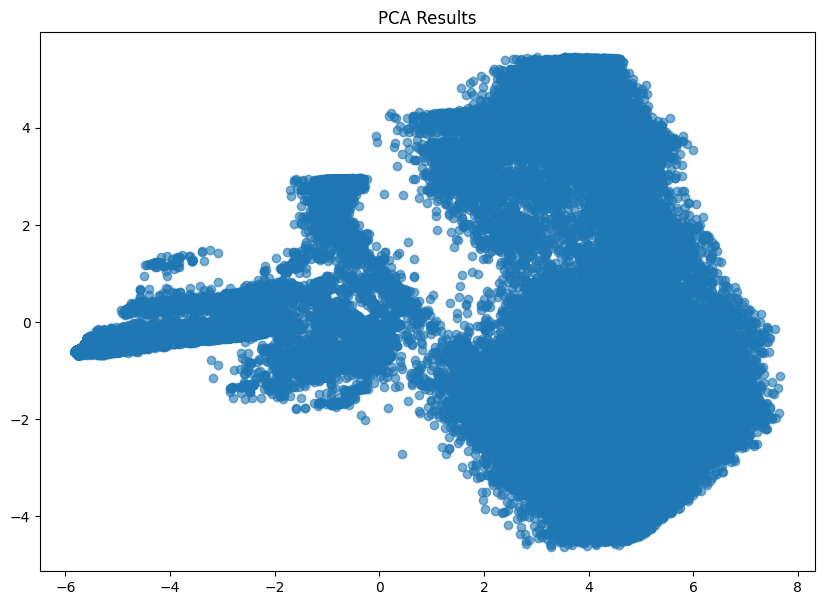

PCA Reconstruction Error: 0.0972

t-SNE Results:


In [ ]:
numerical_columns = train_set.select_dtypes(include=['float64', 'int64']).columns
train_set_for_reduction = train_set[numerical_columns]
train_set_scaled = StandardScaler().fit_transform(train_set_for_reduction)

labels = labels_train_df['attack_cat'].values

n_samples, n_features = train_set_for_reduction.shape
print(f"Number of samples: {n_samples}, Number of features: {n_features}")

print("\nPCA Results:")
pca_result, pca_time, pca, explained_variance_ratio = reduce_dimensions_with_pca(train_set_scaled, n_components=10)
pca_df = pd.DataFrame(pca_result)
print(pca_df.head())
print(f"PCA Time: {pca_time:.2f} seconds")
print(f"PCA Explained Variance Ratio: {explained_variance_ratio}")

plot_reduction_results(pca_result, "PCA")
pca_error = pca_reconstruction_error(pca, pca_result, train_set_scaled)
print(f"PCA Reconstruction Error: {pca_error:.4f}")

print("\nt-SNE Results:")
tsne_result, tsne_time = reduce_dimensions_with_tsne(train_set_scaled, n_components=2, perplexity=5)
tsne_df = pd.DataFrame(tsne_result)
print(tsne_df.head())
print(f"t-SNE Time: {tsne_time:.2f} seconds")
plot_reduction_results(tsne_result, "t-SNE")

print("\nAutoencoder Results:")
input_dim = train_set_scaled.shape[1]
autoencoder_result, autoencoder_time, autoencoder = reduce_dimensions_with_autoencoder(train_set_scaled, input_dim, encoding_dim=2, epochs=50, batch_size=2)
autoencoder_df = pd.DataFrame(autoencoder_result)
print(autoencoder_df.head())
print(f"Autoencoder Time: {autoencoder_time:.2f} seconds")
plot_reduction_results(autoencoder_result, "Autoencoder")

autoencoder_error = autoencoder.evaluate(train_set_scaled, train_set_scaled, verbose=0)
print(f"Autoencoder Reconstruction Error: {autoencoder_error:.4f}")

1. PCA
<br>
Based on the explained variance ratio, around 72% of the total variance in the original data is retained after reducing it to 10 components. While the first few components capture most of the variance, the later components contribute less and less. Additionally, with reconstruction error valued at 27.8%, it shows that a notable amount of information is lost and there is a need for some adjustment on n_components value to capture more variance.
2. t-SNE
<br>
Scatter plot for t-SNE displays a circular and even spread since it does not focus on global variance and more often used to show local neighborhoods or patterns. However, as shown in the scatter plot, there is no clear separable clusters in the reduced data.
3. Autoencoder
<br>
The autoencoder scatter plot shows most points concentrated along the vertical axis with some widely spread horizontal outliers. This suggests that the model may require tuning, as the compressed output appears uneven and less organized compared to PCA or t-SNE and its 74.5% error reconstruction value.

After comparing the three methods above, we have decided to use PCA with some changes on n_components variable to achieve higher variance ratio and lower error reconstruction value.

In [32]:
def find_best_n_components(data, variance_threshold=0.95):
    n_features = data.shape[1]
    cumulative_variances = []

    for n in range(1, n_features + 1):
        _, _, _, explained_variance_ratio = reduce_dimensions_with_pca(data, n_components=n)
        cumulative_variance = np.sum(explained_variance_ratio)
        cumulative_variances.append(cumulative_variance)
        
        if cumulative_variance >= variance_threshold:
            print(f"Threshold met at {n} components with {cumulative_variance} variance\n")
            break

    best_n_components = len(cumulative_variances)
    return best_n_components

variance_threshold = 0.95
best_n_components = find_best_n_components(train_set_scaled, variance_threshold=variance_threshold)

pca_result, pca_time, pca, explained_variance_ratio = reduce_dimensions_with_pca(train_set_scaled, n_components=best_n_components)
print(f"PCA Time: {pca_time:.2f} seconds")
print(f"Explained Variance Ratio (First {best_n_components} components): {explained_variance_ratio}")
pca_error = pca_reconstruction_error(pca, pca_result, train_set_scaled)
print(f"PCA Reconstruction Error: {pca_error:.4f}")

pca_final = PCA(n_components=5)

NameError: name 'train_set_scaled' is not defined

# 3. Compile Preprocessing Pipeline

##### 3.1 Compiling the pipeline

In [35]:
transformer = ColumnTransformer(transformers=[('scaler', StandardScaler(), numerical_columns),
                                              ('target_encode', TargetEncoder(categories='auto', target_type='binary', smooth=0.2, cv=5, random_state=42), ['proto','state','service']),
                                 ], remainder='passthrough').set_output(transform='pandas')
smote = SMOTE(sampling_strategy='auto', random_state=42)

preprocessing_pipeline = ImbPipeline(steps=[
                                   ('prep', transformer),
                                   ('smote', smote),
                                   ('pca', pca_final)
                                   ])
preprocessing_pipeline

NameError: name 'pca_final' is not defined

##### 3.2 Fitting the pipeline

In [217]:
x_train_transformed = preprocessing_pipeline.fit(x_train, y_train)

x_train_transformed

c:\Users\Salsabiila\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Salsabiila\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['dur', 'sbytes', 'dbytes',
                                                   'sttl', 'dttl', 'sloss',
                                                   'dloss', 'sload', 'dload',
                                                   'spkts', 'dpkts', 'swin',
                                                   'dwin', 'stcpb', 'dtcpb',
                                                   'smean', 'dmean',
                                                   'trans_depth',
                                                   'response_body_len', 'sjit',
                                                   'djit', 'sinpkt', 'dinpkt',
                                                   'tcprtt', 'synack', 'ackdat',
                                                   'ct_state_ttl',
                                                   'ct_flw_http_mthd',
                                                   'ct_ftp_cmd', 'ct_srv_src', ...]),
                                                 ('target_encode',
                                                  TargetEncoder(random_state=42,
                                                                smooth=0.2,
                                                                target_type='binary'),
                                                  ['proto', 'state',
                                                   'service'])])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=10))])

In [33]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
print(f"Encoded labels: {y_train_encoded.shape}")
print(f"Original labels: {y_train.shape}")
y_val_encoded = label_encoder.transform(y_val)

Encoded labels: (85830,)
Original labels: (85830, 1)


c:\Users\shulh\Documents\Documents\College\03. Third Year\Artificial Intelligence\Tubes 2 AI\Tubes2AI\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shulh\Documents\Documents\College\03. Third Year\Artificial Intelligence\Tubes 2 AI\Tubes2AI\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [139]:
class sKNNClassifier:
    def __init__(self, k=3, distance_metric='euclidean', p=3):
        """
        Initialize the KNN classifier.
        Args:
        - k: Number of nearest neighbors.
        - distance_metric: Distance metric to use ('euclidean', 'manhattan', 'minkowski').
        - p: Parameter for Minkowski distance (default: 2).
        """
        self.k = k
        self.distance_metric = distance_metric
        self.p = p

    def fit(self, x_train, y_train):
        """
        Store training data.
        Args:
        - x_train: Training data features (2D array).
        - y_train: Multi-target labels (2D array, each row contains [label, attack_cat]).
        """
        self.x_train = x_train
        self.y_train = y_train
        self.m, self.n = x_train.shape

    def predict(self, x_test):
        """
        Predict multi-target labels for test data.
        Args:
        - x_test: Test data features (2D array).
        Returns:
        - Predicted multi-target labels (2D array).
        """
        m_test = x_test.shape[0]
        y_pred = np.zeros((m_test, self.y_train.shape[1]), dtype=object) 

        for i in range(m_test):
            # Calculate distances to all training points
            distances = np.array([self._calculate_distance(x_test[i], x) for x in self.x_train])

            # Find the indices of the k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]

            # Get the labels of the k nearest neighbors
            k_nearest_labels = self.y_train[k_indices]

            # Determine the most common label for each target
            for j in range(self.y_train.shape[1]):
                y_pred[i, j] = Counter(k_nearest_labels[:, j]).most_common(1)[0][0]

        return y_pred

    def _calculate_distance(self, x1, x2):
        """
        Calculate the distance between two points based on the chosen metric.
        Args:
        - x1, x2: Two data points (1D arrays).
        Returns:
        - Distance (float).
        """
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.distance_metric == 'minkowski':
            return np.sum(np.abs(x1 - x2) ** self.p) ** (1 / self.p)
        else:
            raise ValueError("Unsupported distance metric. Choose 'euclidean', 'manhattan', or 'minkowski'.")

In [ ]:
knn = ImbPipeline(steps=[
    ('prep', transformer),
    ('smote', smote),
    ('pca', PCA(n_components=20)),
    ('knn', sKNNClassifier())
])

knn.fit(x_train, y_train)

# Prediction on validation set
# Class labels
y_val_pred_knn = knn.predict(x_val)
# Class probabilities
y_val_pred_proba_knn = knn.predict_proba(x_val)

y_val_decoded = label_encoder.inverse_transform(y_val_encoded)

# Precision, Recall, F1-Score (Weighted and Macro)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_val_encoded, y_val_pred_knn, average='weighted')
macro_f1 = f1_score(y_val_encoded, y_val_pred_knn, average='macro')
print(f"Weighted F1-Score: {f1:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_val_encoded, y_val_pred_knn)
print(f"Cohen's Kappa: {kappa:.4f}")

# ROC-AUC (One-vs-Rest for Multi-Class)
try:
    roc_auc = roc_auc_score(y_val_encoded, y_val_pred_proba_knn, multi_class='ovr', average='weighted')
    print(f"ROC-AUC (Weighted): {roc_auc:.4f}")
except ValueError:
    print("ROC-AUC could not be computed for this dataset.")

# Log Loss
logloss_knn = log_loss(y_val_encoded, y_val_pred_proba_knn)
print(f"\nValidation Log Loss: {logloss_knn:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val_decoded, y_val_pred_knn, target_names=label_encoder.classes_))

# Confusion Matrix
print()
conf_matrix = confusion_matrix(y_val_decoded, y_val_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = ImbPipeline(steps=[
    ('prep', transformer),
    ('smote', smote),
    ('pca', PCA(n_components=20)),
    ('knn', KNeighborsClassifier())
])

knn.fit(x_train, y_train)

# Prediction on validation set
# Class labels
y_val_pred_knn = knn.predict(x_val)
# Class probabilities
y_val_pred_proba_knn = knn.predict_proba(x_val)

y_val_decoded = label_encoder.inverse_transform(y_val_encoded)

# Precision, Recall, F1-Score (Weighted and Macro)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_val_encoded, y_val_pred_knn, average='weighted')
macro_f1 = f1_score(y_val_encoded, y_val_pred_knn, average='macro')
print(f"Weighted F1-Score: {f1:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_val_encoded, y_val_pred_knn)
print(f"Cohen's Kappa: {kappa:.4f}")

# ROC-AUC (One-vs-Rest for Multi-Class)
try:
    roc_auc = roc_auc_score(y_val_encoded, y_val_pred_proba_knn, multi_class='ovr', average='weighted')
    print(f"ROC-AUC (Weighted): {roc_auc:.4f}")
except ValueError:
    print("ROC-AUC could not be computed for this dataset.")

# Log Loss
logloss_knn = log_loss(y_val_encoded, y_val_pred_proba_knn)
print(f"\nValidation Log Loss: {logloss_knn:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val_decoded, y_val_pred_knn, target_names=label_encoder.classes_))

# Confusion Matrix
print()
conf_matrix = confusion_matrix(y_val_decoded, y_val_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## B. Naive Bayes

In [53]:
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self, smoothing=1e-6):
        self.priors = {}
        self.gaussian_params = defaultdict(dict)
        self.classes = None
        self.smoothing = smoothing

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        
        for cls in self.classes:
            X_cls = X[y == cls]
            self.priors[cls] = len(X_cls) / n_samples
            
            for feature in range(n_features):
                feature_data = X_cls[:, feature]
                mean = np.mean(feature_data)
                var = np.var(feature_data) + self.smoothing
                self.gaussian_params[cls][feature] = {'mean': mean, 'var': var}

    # calculate gaussian likelihood
    def _gaussian_likelihood(self, x, mean, var):
        exponent = -((x - mean) ** 2) / (2 * var)
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(exponent)

    # predict class probability
    def predict_proba(self, X):
        n_samples, n_features = X.shape
        probs = np.zeros((n_samples, len(self.classes)))
        
        for idx, cls in enumerate(self.classes):
            log_prior = np.log(self.priors[cls])
            log_likelihoods = np.zeros(n_samples)
            
            for feature in range(n_features):
                mean = self.gaussian_params[cls][feature]['mean']
                var = self.gaussian_params[cls][feature]['var']
                log_likelihoods += np.log(self._gaussian_likelihood(X[:, feature], mean, var) + self.smoothing)
                
            probs[:, idx] = log_prior + log_likelihoods
        
        # Normalize probabilities
        probs = np.exp(probs)
        probs /= probs.sum(axis=1, keepdims=True)
        return probs

    def predict(self, X):
        """Predict class labels for all instances."""
        probs = self.predict_proba(X)
        return self.classes[np.argmax(probs, axis=1)]

Weighted F1-Score: 0.6592
Macro F1-Score: 0.3545
Cohen's Kappa: 0.5368
ROC-AUC (Weighted): 0.9170
Validation Log Loss: 1.8194

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.09      0.25      0.14       314
      Backdoor       0.05      0.67      0.10       297
           DoS       0.25      0.06      0.10      2001
      Exploits       0.75      0.36      0.49      5617
       Fuzzers       0.50      0.36      0.42      3182
       Generic       0.98      0.97      0.97      6901
        Normal       0.91      0.77      0.84      9580
Reconnaissance       0.33      0.37      0.35      1739
     Shellcode       0.06      0.54      0.11       218
         Worms       0.02      0.68      0.03        25

      accuracy                           0.62     29874
     macro avg       0.39      0.50      0.35     29874
  weighted avg       0.75      0.62      0.66     29874




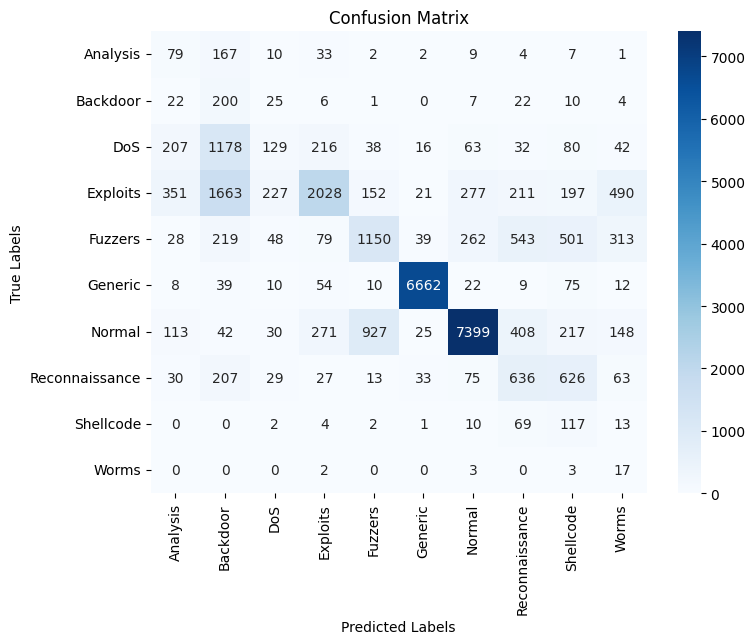

In [54]:

nb = ImbPipeline(steps=[
    ('prep', transformer),
    ('smote', smote),
    ('pca', PCA(n_components=15)),
    ('nb', NaiveBayesClassifier())
])

nb.fit(x_train, y_train_encoded)

# Prediction on validation set
# Class labels
y_val_pred_nb = nb.predict(x_val)
# Class probabilities
y_val_pred_proba_nb = nb.predict_proba(x_val)

# Precision, Recall, F1-Score (Weighted and Macro)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_val_encoded, y_val_pred_nb, average='weighted')
macro_f1 = f1_score(y_val_encoded, y_val_pred_nb, average='macro')
print(f"Weighted F1-Score: {f1:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_val_encoded, y_val_pred_nb)
print(f"Cohen's Kappa: {kappa:.4f}")

# ROC-AUC (One-vs-Rest for Multi-Class)
try:
    roc_auc = roc_auc_score(y_val_encoded, y_val_pred_proba_nb, multi_class='ovr', average='weighted')
    print(f"ROC-AUC (Weighted): {roc_auc:.4f}")
except ValueError:
    print("ROC-AUC could not be computed for this dataset.")

# Log Loss
logloss_nb = log_loss(y_val_encoded, y_val_pred_proba_nb)
print(f"Validation Log Loss: {logloss_nb:.4f}")

# Classfication Report
print("\nClassification Report:")
print(classification_report(label_encoder.inverse_transform(y_val_encoded),
                            label_encoder.inverse_transform(y_val_pred_nb),
                            target_names=label_encoder.classes_))

# Confusion Matrix
print()
conf_matrix_nb = confusion_matrix(label_encoder.inverse_transform(y_val_encoded),
                                  label_encoder.inverse_transform(y_val_pred_nb),
                                  labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Weighted F1-Score: 0.5920
Macro F1-Score: 0.3033
Cohen's Kappa: 0.4540
ROC-AUC (Weighted): 0.8804

Validation Log Loss: 1.5178

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.12      0.25      0.17       314
      Backdoor       0.05      0.81      0.09       297
           DoS       0.06      0.00      0.01      2001
      Exploits       0.79      0.28      0.41      5617
       Fuzzers       0.52      0.13      0.21      3182
       Generic       0.93      0.96      0.95      6901
        Normal       1.00      0.64      0.78      9580
Reconnaissance       0.27      0.38      0.32      1739
     Shellcode       0.05      0.54      0.08       218
         Worms       0.01      0.84      0.01        25

      accuracy                           0.53     29874
     macro avg       0.38      0.48      0.30     29874
  weighted avg       0.76      0.53      0.59     29874




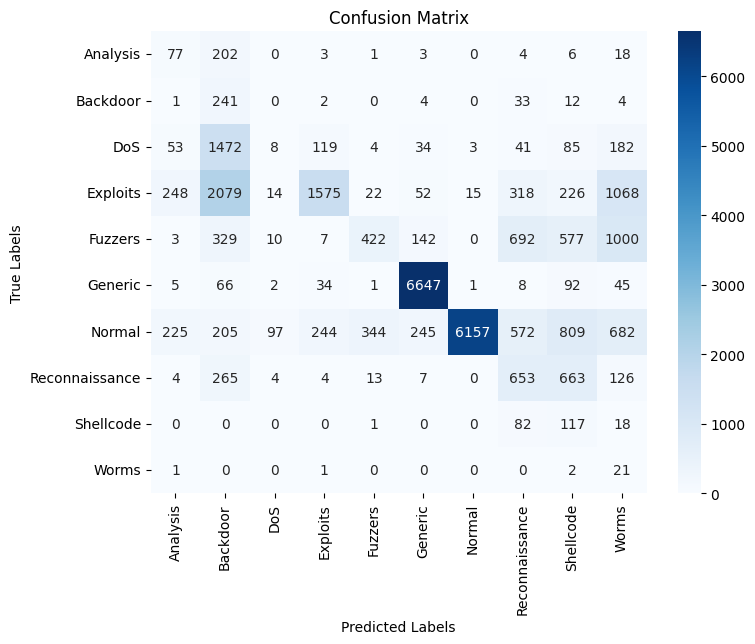

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = ImbPipeline(steps=[
    ('prep', transformer),
    ('smote', smote),
    ('pca', PCA(n_components=20)),
    ('nb', GaussianNB())
])

nb.fit(x_train, y_train_encoded)

# Prediction on validation set
# Class labels
y_val_pred_nb = nb.predict(x_val)
# Class probabilities
y_val_pred_proba_nb = nb.predict_proba(x_val)

# Precision, Recall, F1-Score (Weighted and Macro)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_val_encoded, y_val_pred_nb, average='weighted')
macro_f1 = f1_score(y_val_encoded, y_val_pred_nb, average='macro')
print(f"Weighted F1-Score: {f1:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_val_encoded, y_val_pred_nb)
print(f"Cohen's Kappa: {kappa:.4f}")

# ROC-AUC (One-vs-Rest for Multi-Class)
try:
    roc_auc = roc_auc_score(y_val_encoded, y_val_pred_proba_nb, multi_class='ovr', average='weighted')
    print(f"ROC-AUC (Weighted): {roc_auc:.4f}")
except ValueError:
    print("ROC-AUC could not be computed for this dataset.")

# Log Loss
logloss_nb = log_loss(y_val_encoded, y_val_pred_proba_nb)
print(f"\nValidation Log Loss: {logloss_nb:.4f}")

# Classfication Report
print("\nClassification Report:")
print(classification_report(label_encoder.inverse_transform(y_val_encoded),
                            label_encoder.inverse_transform(y_val_pred_nb),
                            target_names=label_encoder.classes_))

# Confusion Matrix
print()
conf_matrix_nb = confusion_matrix(label_encoder.inverse_transform(y_val_encoded),
                                  label_encoder.inverse_transform(y_val_pred_nb),
                                  labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## C. ID3

In [267]:
class ID3Classifier:
    def __init__(self, min_samples_leaf=1, max_depth=None):
        self.tree = None
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.majority_class = None

    # Calculate the entropy of a label distribution.
    def entropy(self, y):
        counts = pd.Series(y).value_counts(normalize=True)
        return -np.sum(counts * np.log2(counts + 1e-9))  # Adding small value to avoid log(0)

    # Calculate the information gain of an attribute.
    def information_gain(self, X, y, attribute):
        total_entropy = self.entropy(y)
        values, counts = np.unique(X[:, attribute], return_counts=True)
        weighted_entropy = np.sum(
            (counts[i] / len(y)) * self.entropy(y[X[:, attribute] == values[i]])
            for i in range(len(values))
        )
        return total_entropy - weighted_entropy

    # Find the best attribute to split on
    def best_attribute(self, X, y):
        return max(range(X.shape[1]), key=lambda attr: self.information_gain(X, y, attr))

    # Build the decision tree
    def build_tree(self, X, y, attributes, depth=0):
        if len(np.unique(y)) == 1:
            return y[0]  # Pure node, return class directly

        if len(attributes) == 0 or (self.max_depth is not None and depth >= self.max_depth):
            return Counter(y).most_common(1)[0][0]  # Return majority class

        best_attr = self.best_attribute(X, y)
        best_attr_name = attributes[best_attr]
        tree = {best_attr_name: {}}

        for value in np.unique(X[:, best_attr]):
            subset_X = X[X[:, best_attr] == value]
            subset_y = y[X[:, best_attr] == value]

            if len(subset_y) < self.min_samples_leaf:
                tree[best_attr_name][value] = Counter(y).most_common(1)[0][0]
            else:
                remaining_attrs = [attr for i, attr in enumerate(attributes) if i != best_attr]
                tree[best_attr_name][value] = self.build_tree(subset_X, subset_y, remaining_attrs, depth + 1)

        return tree

    # Fit the model
    def fit(self, X, y):
        y = np.array(y)
        self.majority_class = Counter(y).most_common(1)[0][0]
        attributes = list(range(X.shape[1]))  # Using indices as attributes
        self.tree = self.build_tree(X, y, attributes)

    # Predict the class label for a single instance
    def predict_single(self, instance, tree):
        if not isinstance(tree, dict):
            return tree

        root_attribute = next(iter(tree))
        attribute_index = int(root_attribute)  # Assuming indices as attribute names
        subtree = tree[root_attribute].get(instance[attribute_index], None)

        if subtree is None:
            return self.majority_class  # Default to majority class
        
        return self.predict_single(instance, subtree)

    # Predict the class labels for a dataset
    def predict(self, X):
        return np.array([self.predict_single(instance, self.tree) for instance in X])

    # Predict the class probabilities for a dataset
    def predict_proba(self, X):
        predictions = self.predict(X)
        classes = np.unique(predictions)
        probas = np.zeros((X.shape[0], len(classes)))

        for i, pred in enumerate(predictions):
            class_index = np.where(classes == pred)[0][0]
            probas[i, class_index] = 1.0  # Assigning 100% probability to predicted class

        return probas


In [270]:
import numpy as np
import pandas as pd
from collections import Counter
from math import log2

class ID3Classifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        """
        ID3 Classifier Initialization
        :param max_depth: Maximum depth of the decision tree
        :param min_samples_split: Minimum samples required to split a node
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        """
        Fit the decision tree to the data
        :param X: Feature matrix (Pandas DataFrame or NumPy array)
        :param y: Target vector (Pandas Series or NumPy array)
        """
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        if isinstance(y, np.ndarray):
            y = pd.Series(y)
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        """
        Predict class labels for input samples
        :param X: Feature matrix (Pandas DataFrame or NumPy array)
        :return: Predicted labels (NumPy array)
        """
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        return np.array([self._predict_sample(sample, self.tree) for _, sample in X.iterrows()])

    def _entropy(self, y):
        """
        Calculate entropy for the target variable
        :param y: Target vector
        :return: Entropy value
        """
        counts = Counter(y)
        total = len(y)
        return -sum((count / total) * log2(count / total) for count in counts.values())

    def _information_gain(self, X_col, y):
        """
        Calculate information gain for a specific feature
        :param X_col: Column of feature values
        :param y: Target vector
        :return: Information gain
        """
        total_entropy = self._entropy(y)
        values, counts = np.unique(X_col, return_counts=True)
        weighted_entropy = sum(
            (counts[i] / len(X_col)) * self._entropy(y[X_col == value])
            for i, value in enumerate(values)
        )
        return total_entropy - weighted_entropy

    def _best_split(self, X, y):
        """
        Find the best feature and value to split the data
        :param X: Feature matrix
        :param y: Target vector
        :return: Best feature and information gain
        """
        best_gain = -1
        best_feature = None
        for col in X.columns:
            gain = self._information_gain(X[col], y)
            if gain > best_gain:
                best_gain = gain
                best_feature = col
        return best_feature, best_gain

    def _build_tree(self, X, y, depth):
        """
        Recursively build the decision tree
        :param X: Feature matrix
        :param y: Target vector
        :param depth: Current depth of the tree
        :return: Tree (dict or leaf value)
        """
        if len(y) < self.min_samples_split or len(np.unique(y)) == 1 or (self.max_depth and depth >= self.max_depth):
            return Counter(y).most_common(1)[0][0]

        best_feature, best_gain = self._best_split(X, y)
        if best_gain == 0:
            return Counter(y).most_common(1)[0][0]

        tree = {best_feature: {}}
        for value in np.unique(X[best_feature]):
            subtree = self._build_tree(
                X[X[best_feature] == value].drop(columns=best_feature),
                y[X[best_feature] == value],
                depth + 1,
            )
            tree[best_feature][value] = subtree
        return tree

    def _predict_sample(self, sample, tree):
        """
        Predict the class label for a single sample
        :param sample: Single sample (Pandas Series)
        :param tree: Decision tree
        :return: Predicted label
        """
        if not isinstance(tree, dict):
            return tree
        feature = next(iter(tree))
        value = sample[feature]
        subtree = tree.get(feature, {}).get(value, Counter(tree.values()).most_common(1)[0][0])
        return self._predict_sample(sample, subtree)


In [ ]:
id3_pipeline = ImbPipeline(steps=[
    ('prep', transformer),
    ('smote', smote),
    ('pca', PCA(n_components=20)),
    ('id3', ID3Classifier())
])

id3_pipeline.fit(x_train, y_train_encoded)

# Prediction on validation set
# Class labels
y_val_pred_id3 = id3_pipeline.predict(x_val)
# Class probabilities
y_val_pred_proba_id3 = id3_pipeline.predict_proba(x_val)

# Precision, Recall, F1-Score (Weighted and Macro)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_val_encoded, y_val_pred_id3, average='weighted')
macro_f1 = f1_score(y_val_encoded, y_val_pred_id3, average='macro')
print(f"Weighted F1-Score: {f1:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_val_encoded, y_val_pred_id3)
print(f"Cohen's Kappa: {kappa:.4f}")

# ROC-AUC (One-vs-Rest for Multi-Class)
try:
    roc_auc = roc_auc_score(y_val_encoded, y_val_pred_proba_id3, multi_class='ovr', average='weighted')
    print(f"ROC-AUC (Weighted): {roc_auc:.4f}")
except ValueError:
    print("ROC-AUC could not be computed for this dataset.")

# Log Loss
logloss_id3 = log_loss(y_val_encoded, y_val_pred_proba_id3)
print(f"\nValidation Log Loss: {logloss_id3:.4f}")


# Classfication Report
print("\nClassification Report:")
print(classification_report(label_encoder.inverse_transform(y_val_encoded),
                            label_encoder.inverse_transform(y_val_pred_id3),
                            target_names=label_encoder.classes_))

# Confusion Matrix
print()
conf_matrix_id3 = confusion_matrix(label_encoder.inverse_transform(y_val_encoded),
                                   label_encoder.inverse_transform(y_val_pred_id3),
                                   labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_id3, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Weighted F1-Score: 0.7363
Macro F1-Score: 0.4471
Cohen's Kappa: 0.6541
ROC-AUC (Weighted): 0.8425

Validation Log Loss: 9.9912

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.11      0.25      0.16       314
      Backdoor       0.05      0.10      0.07       297
           DoS       0.26      0.35      0.30      2001
      Exploits       0.66      0.52      0.58      5617
       Fuzzers       0.55      0.56      0.55      3182
       Generic       0.97      0.97      0.97      6901
        Normal       0.92      0.85      0.89      9580
Reconnaissance       0.58      0.63      0.60      1739
     Shellcode       0.23      0.49      0.32       218
         Worms       0.03      0.08      0.04        25

      accuracy                           0.72     29874
     macro avg       0.44      0.48      0.45     29874
  weighted avg       0.76      0.72      0.74     29874




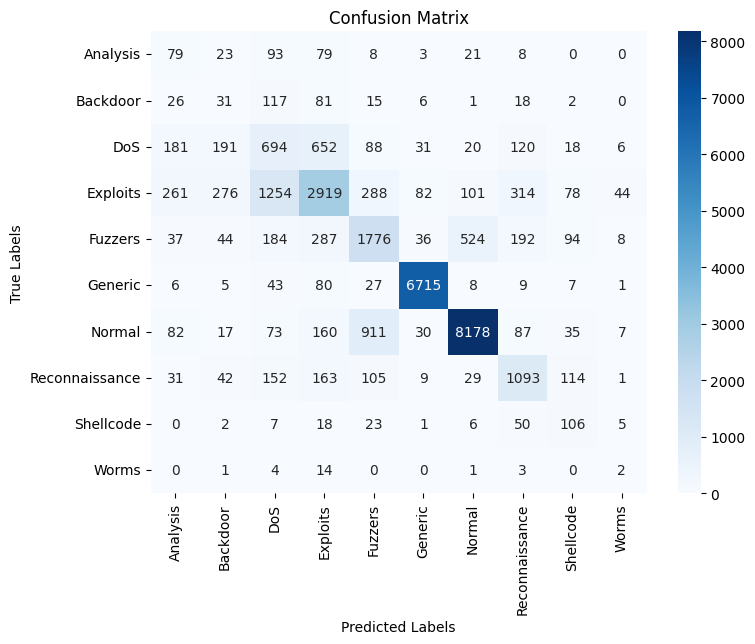

In [248]:
from sklearn.tree import DecisionTreeClassifier

id3_pipeline = ImbPipeline(steps=[
    ('prep', transformer),
    ('smote', smote),
    ('pca', PCA(n_components=20)),
    ('id3', DecisionTreeClassifier(criterion='entropy', random_state=42))
])

id3_pipeline.fit(x_train, y_train_encoded)

# Prediction on validation set
# Class labels
y_val_pred_id3 = id3_pipeline.predict(x_val)
# Class probabilities
y_val_pred_proba_id3 = id3_pipeline.predict_proba(x_val)

# Precision, Recall, F1-Score (Weighted and Macro)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_val_encoded, y_val_pred_id3, average='weighted')
macro_f1 = f1_score(y_val_encoded, y_val_pred_id3, average='macro')
print(f"Weighted F1-Score: {f1:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_val_encoded, y_val_pred_id3)
print(f"Cohen's Kappa: {kappa:.4f}")

# ROC-AUC (One-vs-Rest for Multi-Class)
try:
    roc_auc = roc_auc_score(y_val_encoded, y_val_pred_proba_id3, multi_class='ovr', average='weighted')
    print(f"ROC-AUC (Weighted): {roc_auc:.4f}")
except ValueError:
    print("ROC-AUC could not be computed for this dataset.")

# Log Loss
logloss_id3 = log_loss(y_val_encoded, y_val_pred_proba_id3)
print(f"\nValidation Log Loss: {logloss_id3:.4f}")


# Classfication Report
print("\nClassification Report:")
print(classification_report(label_encoder.inverse_transform(y_val_encoded),
                            label_encoder.inverse_transform(y_val_pred_id3),
                            target_names=label_encoder.classes_))

# Confusion Matrix
print()
conf_matrix_id3 = confusion_matrix(label_encoder.inverse_transform(y_val_encoded),
                                   label_encoder.inverse_transform(y_val_pred_id3),
                                   labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_id3, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [156]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [157]:
# Type your code here

# 5. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`